5. Perform Sentiment Analysis in the network graph using RNN.

In [15]:
import numpy as np
# Sample data (replace this with your actual dataset)
texts = [
    "I love this product!",
    "This is terrible and I hate it.",
    "Absolutely amazing experience.",
    "Not good, very disappointing.",
    "I'm so happy with the service."
]


labels = np.array([1, 0, 1, 0, 1])

# Tokenize and preprocess

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=10)

# Build the RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=10))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, labels, epochs=5, batch_size=2)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7125 - loss: 0.6936
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7375 - loss: 0.6841
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5500 - loss: 0.6774
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4250 - loss: 0.6786    
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5500 - loss: 0.6618


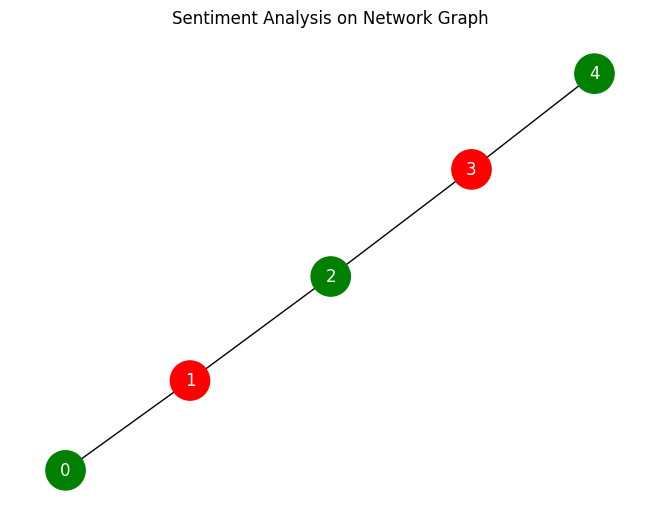

In [43]:
import networkx as nx
import matplotlib.pyplot as plt


# Define a simple graph
edge_list = [(0, 1), (1, 2), (2, 3), (3, 4)]

G = nx.Graph()
G.add_edges_from(edge_list)



#real_predictions = model.predict(X)
#real_labels = (real_predictions > 0.5).astype(int).flatten())



# Fake predictions from your model (replace with actual model.predict if needed)
fake_predictions = np.array([1, 0, 1, 0, 1])  # 1 = positive, 0 = negative

# Assign sentiment to nodes
for i, node in enumerate(G.nodes()):
    G.nodes[node]['sentiment'] = fake_predictions[i]

# Color node based on sentiment
colors = ['green' if G.nodes[n]['sentiment'] == 1 else 'red' for n in G.nodes()]

nx.draw(G, with_labels=True, node_color=colors, node_size=800, font_color='white')
plt.title("Sentiment Analysis on Network Graph")
plt.show()


In [1]:
import numpy as np

# Simulated property review texts and binary sentiment labels (1 = positive, 0 = negative)
texts = [
    "The apartment was clean and spacious.",
    "Terrible service and noisy neighborhood.",
    "I had a wonderful experience staying here.",
    "Walls were damp and the bathroom smelled bad.",
    "Great location and helpful landlord!"
]

labels = np.array([1, 0, 1, 0, 1])

# Tokenize and preprocess
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=10)

# Build the RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=10))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, labels, epochs=5, batch_size=2)

# -------------------------
# 🧪 Evaluate the model
loss, accuracy = model.evaluate(X, labels)
print(f"\nEvaluation:\nLoss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# -------------------------
# 🔮 Predict sentiment for new reviews
new_reviews = [
    "The house was cozy and well-lit.",
    "Worst property I’ve ever stayed in.",
    "Nice and quiet place.",
    "Too dirty and badly maintained."
]

# Preprocess new reviews
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded = pad_sequences(new_sequences, maxlen=10)

# Predict
predictions = model.predict(new_padded)

# Show results
print("\nPredictions:")
for review, pred in zip(new_reviews, predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment} ({pred[0]:.2f})\n")


C:\Users\hp\Desktop\TFProj\tfvenv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1625 - loss: 0.7179  
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.6050
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.5012
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.4693
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.3837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 1.0000 - loss: 0.3345

Evaluation:
Loss: 0.3345, Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step

Predictions:
Review: The house was cozy and well-lit.
Predicted Sentiment: Positive (0.63)

Review: Worst property I’ve ever stayed in.
Predicted Sentiment: Positive (0.59)

Review: Nice and quiet place.
Predicted Sentiment: Positive (0.61)

Review: Too dirty and badly maintained.
Predicted Sentiment: Positive (0.61)

